In [4]:
import pandas as pd

In [9]:
df = pd.read_csv("Boston Housing Dataset.csv")
df = pd.read_csv("test.csv")
df = pd.read_csv("submission exemple.csv")
print(df)

      ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98

In [10]:
print(df.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [11]:
print(df.describe())

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

In [12]:
print(df.columns)

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


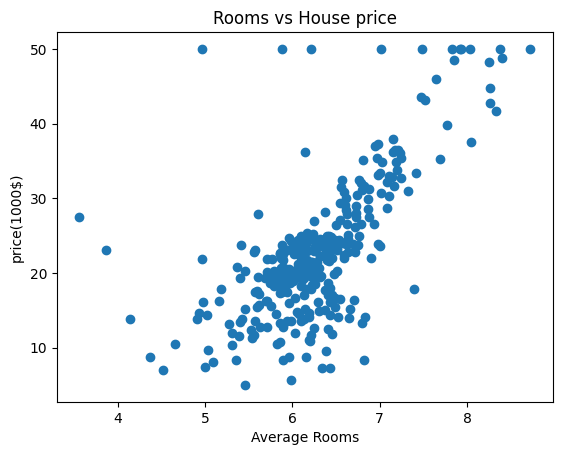

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df["rm"], df["medv"])
plt.xlabel("Average Rooms")
plt.ylabel("price(1000$)")
plt.title("Rooms vs House price")
plt.show()

In [14]:
print(df.rm)
print(df.medv)

0      6.575
1      6.421
2      6.998
3      7.147
4      6.012
       ...  
328    5.569
329    6.593
330    6.120
331    6.976
332    6.030
Name: rm, Length: 333, dtype: float64
0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64


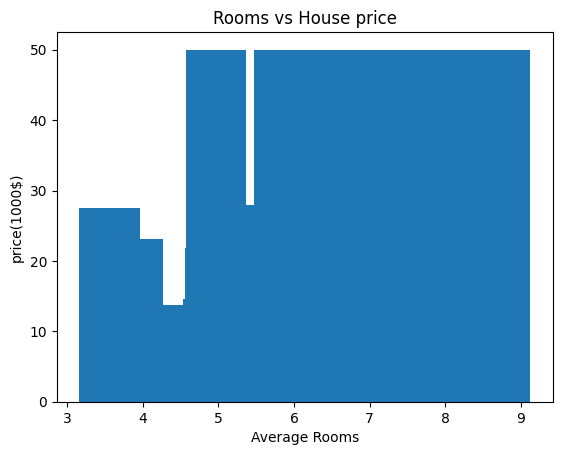

In [15]:
import matplotlib.pyplot as plt
plt.bar(df["rm"], df["medv"])
plt.xlabel("Average Rooms")
plt.ylabel("price(1000$)")
plt.title("Rooms vs House price")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X = df[["rm"]]
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"means squared error: {mse}")

means squared error: 36.361622515889756


In [35]:
print(model.coef_)  # e.g., [9.12] → Each room adds ~$9,120 to the price.

[8.58442449]


In [36]:
print(model.intercept_)  # e.g., -34.67 → Negative intercept (theoretical, not realistic).

-30.96185860010203


In [37]:
model.predict([[6.5]])  # Predict price for a house with 6.5 rooms.

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.83690059])